In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

In [16]:
X = np.array([[1], [3]])
poly = PolynomialFeatures(8, include_bias=True)
r = poly.fit_transform(X)
print(len(r[0]))


9


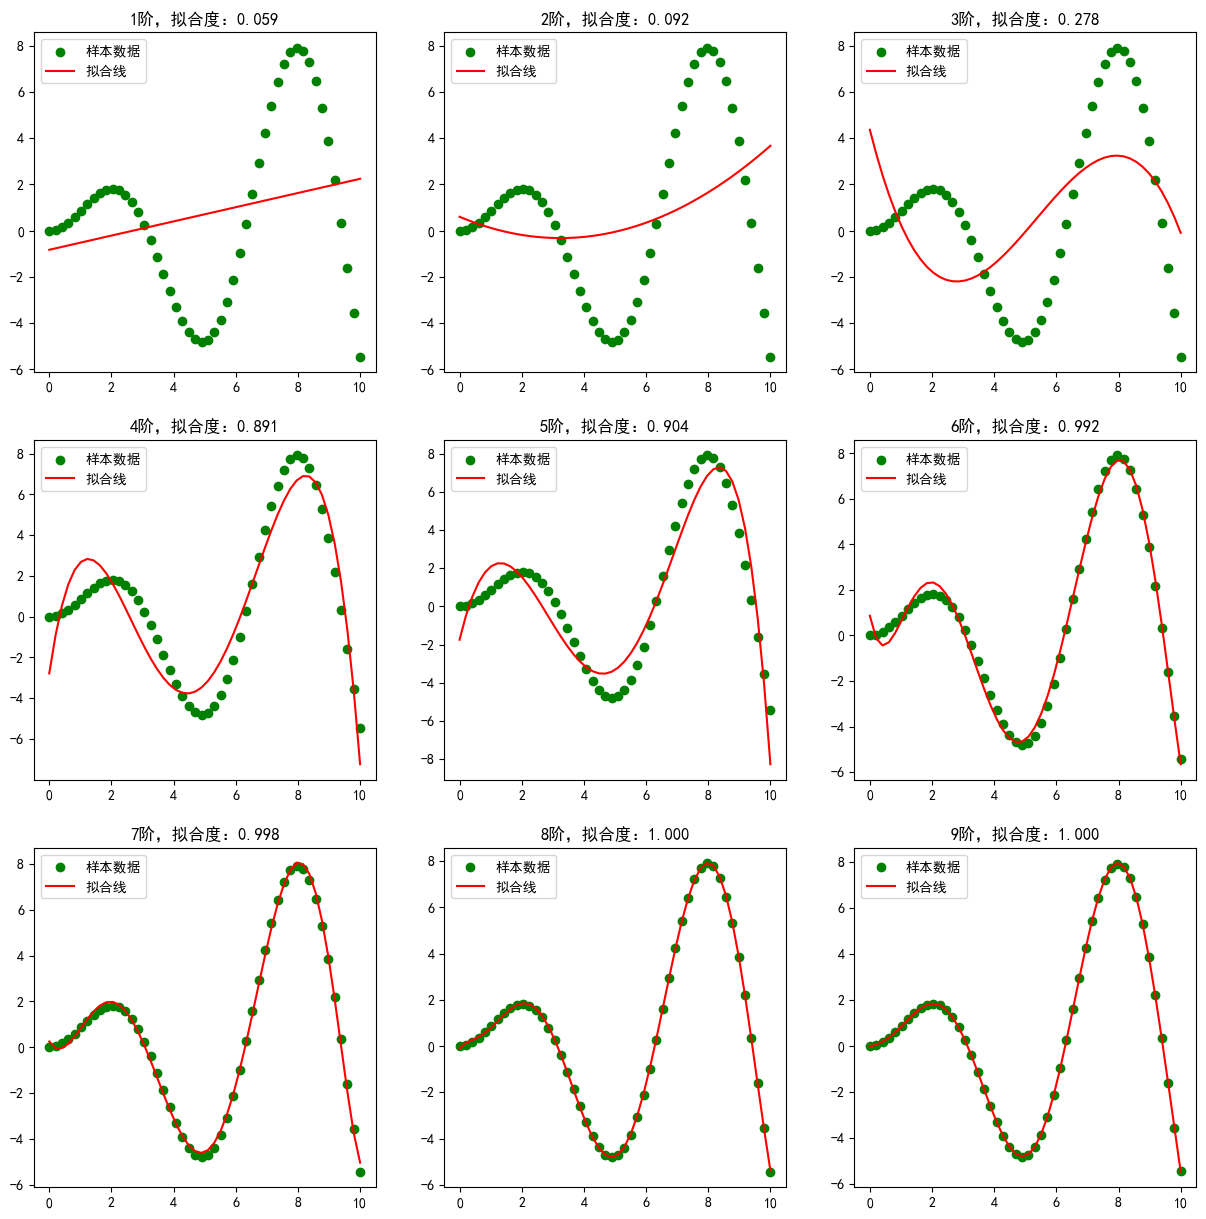

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
figure, ax = plt.subplots(3, 3)
figure.set_size_inches(15, 15)
ax = ax.ravel()

# 进行1阶到6阶的多项式扩展。（1阶相当于没有扩展）
for n in range(1, 10):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_transform = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_transform, y)
    ax[n - 1].set_title(f"{n}阶，拟合度：{lr.score(X_transform, y):.3f}")
    ax[n - 1].scatter(x, y, c="g", label="样本数据")
    ax[n - 1].plot(x, lr.predict(X_transform), "r-", label="拟合线")
    ax[n - 1].legend()


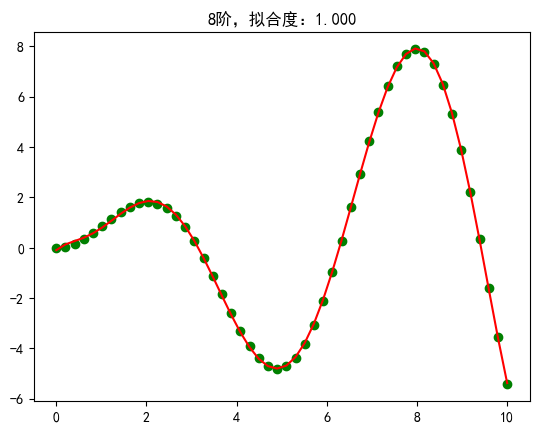

In [14]:
from sklearn.pipeline import  Pipeline

x = np.linspace(0,10,50)
y = x * np.sin(x)
X = x[:, np.newaxis]

steps = [('poly',PolynomialFeatures(include_bias=False)),('lr',LinearRegression())]
pipe = Pipeline(steps)
pipe.set_params(poly__degree = 8)
pipe.fit(X,y)
score = pipe.score(X,y)
plt.title(f"8阶，拟合度：{score:.3f}")
plt.scatter(X, y, c="g", label="样本数据")
plt.plot(X, pipe.predict(X), "r-", label="拟合线")
